In [5]:
from rdkit import Chem
from rdkit.Chem import QED, Descriptors, Lipinski, rdMolDescriptors
import pandas as pd

def compute_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        qed = QED.qed(mol)
        logp = Descriptors.MolLogP(mol)
        molwt = Descriptors.MolWt(mol)
        hba = Lipinski.NumHAcceptors(mol)
        hbd = Lipinski.NumHDonors(mol)
        tpsa = rdMolDescriptors.CalcTPSA(mol)
        num_rot_bonds = Lipinski.NumRotatableBonds(mol)
        # 将SMILES字符串作为列表的第一个元素返回
        return [smiles, qed, logp, molwt, hba, hbd, tpsa, num_rot_bonds]
    else:
        # 如果SMILES无效，返回None，同时保留SMILES字符串以便于识别
        return [smiles] + [None] * 7

smiles_path = 'Inhibitor1368_data/USTB-Corrosion inhibitor-smiles.txt'
with open(smiles_path, 'r') as file:
    smiles_list = file.read().splitlines()

properties_list = [compute_properties(smiles) for smiles in smiles_list]

# 在列名列表中首先添加SMILES
properties_df = pd.DataFrame(properties_list, columns=['SMILES', 'QED', 'LogP', 'MolWt', 'HBA', 'HBD', 'TPSA', 'NumRotBonds'])

print(properties_df)

# 可以将结果保存到CSV文件
properties_df.to_csv('Inhibitor1368_data/Inhibitor1368_molecular_properties.csv', index=False)



                                                 SMILES       QED     LogP  \
0                       [Br-].c1ccc(OCCC[n+]2ccccn2)cc1  0.513809  -1.1578   
1                       [Br-].c1ccc(OCCC[n+]2ccccn2)cc1  0.513809  -1.1578   
2                       [Br-].c1ccc(OCCC[n+]2ccccn2)cc1  0.513809  -1.1578   
3                       [Br-].c1ccc(OCCC[n+]2ccccn2)cc1  0.513809  -1.1578   
4              [N-]=[N+]=NCc1cc(CN2CCCCC2)c(O)c2ncccc12  0.529684   3.7366   
...                                                 ...       ...      ...   
1363  OC[C@H]1OC2OC3[C@@H](CO)OC(OC4[C@@H](CO)OC(OC5...  0.112539 -15.2306   
1364                     CN(C)NC(=O)NCCCCCCNC(=O)NN(C)C  0.357762   0.0984   
1365                     CN(C)NC(=O)NCCCCCCNC(=O)NN(C)C  0.357762   0.0984   
1366                     CN(C)NC(=O)NCCCCCCNC(=O)NN(C)C  0.357762   0.0984   
1367                     CN(C)NC(=O)NCCCCCCNC(=O)NN(C)C  0.357762   0.0984   

         MolWt  HBA  HBD    TPSA  NumRotBonds  
0      295.180 

In [10]:
import pandas as pd

# 读取两个CSV文件
df1 = pd.read_csv('Inhibitor1368_mose_data/Inhibitor1368_molecular_properties.csv')
df2 = pd.read_csv('Inhibitor1368_mose_data/moses2.csv')

# 使用merge函数按照SMILES列进行拼接，使用left join确保第一个文件中的所有SMILES都被保留
merged_df = pd.merge(df2, df1[['SMILES', 'IE', 'Concentration_mM']], on='SMILES', how='left')

# 输出拼接后的DataFrame
print(merged_df)

# 将NaN值替换为None
merged_df = merged_df.where(pd.notnull(merged_df), None)

# 将结果保存到CSV文件
merged_df.to_csv('Inhibitor1368_mose_data/merged_file.csv', index=False)


                                             SMILES       qed     logp  \
0            CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1  0.896898  1.68070   
1              CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1  0.862259  3.72930   
2            CC1C2CCC(C2)C1CN(CCO)C(=O)c1ccc(Cl)cc1  0.901948  3.45670   
3               Cc1c(Cl)cccc1Nc1ncccc1C(=O)OCC(O)CO  0.701022  2.29702   
4                  Cn1cnc2c1c(=O)n(CC(O)CO)c(=O)n2C  0.646083 -2.21310   
...                                             ...       ...      ...   
1048575       O=C(Cn1nc2c3ccccc3ncn2c1=O)NCc1ccccc1  0.611334  1.36060   
1048576    Cc1ccc(CNC(=O)Cn2nc3c4ccccc4ncn3c2=O)cc1  0.608807  1.66902   
1048577     Cc1cccc(NC(=O)Cn2nc3c4ccccc4ncn3c2=O)c1  0.621563  1.99132   
1048578  Cc1ccc(C)c(NC(=O)Cn2nc3c4ccccc4ncn3c2=O)c1  0.616490  2.29974   
1048579    Cc1cccc(NC(=O)Cn2nc3c4ccccc4ncn3c2=O)c1C  0.616490  2.29974   

              molwt  HBA  HBD    TPSA  NumRotBonds  IE  Concentration_mM  
0        281.083412    3    2   87.3

                                   SMILES       qed     logp       molwt  HBA  \
0  CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1  0.896898  1.68070  281.083412    3   
1    CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1  0.862259  3.72930  292.097855    4   
2  CC1C2CCC(C2)C1CN(CCO)C(=O)c1ccc(Cl)cc1  0.901948  3.45670  321.149557    2   
3     Cc1c(Cl)cccc1Nc1ncccc1C(=O)OCC(O)CO  0.701022  2.29702  336.087685    6   
4        Cn1cnc2c1c(=O)n(CC(O)CO)c(=O)n2C  0.646083 -2.21310  254.101505    8   

   HBD    TPSA  NumRotBonds  IE  Concentration_mM  
0    2   87.31            3 NaN               NaN  
1    0   44.12            4 NaN               NaN  
2    1   40.54            5 NaN               NaN  
3    3   91.68            6 NaN               NaN  
4    2  102.28            3 NaN               NaN  
SMILES and Attributes:
[['CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1' 0.89689831 1.6807 ... 3 nan
  nan]
 ['CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1' 0.862259477 3.7293 ... 4 nan nan]
 ['CC1C2CCC(C2)C1CN(CCO)C

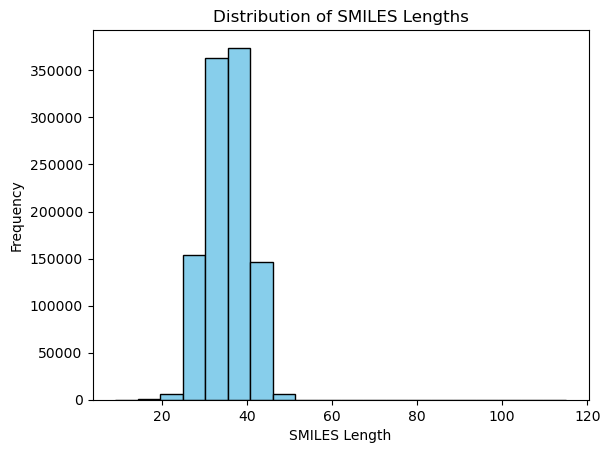

In [1]:
import pandas as pd
from rdkit import Chem

import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
# 从CSV文件中读取数据
df = pd.read_csv('Inhibitor1368_mose_data/merged_file.csv')

# 显示数据的前几行，以确保正确读取
print(df.head())

# 提取SMILES和属性列
mols = df[['SMILES', 'qed', 'logp','molwt','HBA','HBD','TPSA','NumRotBonds','IE', 'Concentration_mM']].values

# 显示提取的SMILES和属性
print("SMILES and Attributes:")
print(mols)
# 提取SMILES列
smiles_column = df['SMILES']

# 找到最长的SMILES长度
max_smiles_length = max(len(smiles) for smiles in smiles_column)

print("The maximum length of SMILES:", max_smiles_length)
# 统计SMILES字符长度，并画出分布图
smiles_lengths = [len(mol[0]) for mol in mols]
plt.hist(smiles_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of SMILES Lengths')
plt.xlabel('SMILES Length')
plt.ylabel('Frequency')
plt.grid(False)

# 保存为PDF文件
plt.savefig('figures/moses_SMILES_Length.pdf', format='pdf', bbox_inches='tight')
plt.show()


                                   SMILES       qed     logp       molwt  HBA  \
0  CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1  0.896898  1.68070  281.083412    3   
1    CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1  0.862259  3.72930  292.097855    4   
2  CC1C2CCC(C2)C1CN(CCO)C(=O)c1ccc(Cl)cc1  0.901948  3.45670  321.149557    2   
3     Cc1c(Cl)cccc1Nc1ncccc1C(=O)OCC(O)CO  0.701022  2.29702  336.087685    6   
4        Cn1cnc2c1c(=O)n(CC(O)CO)c(=O)n2C  0.646083 -2.21310  254.101505    8   

   HBD    TPSA  NumRotBonds  IE  Concentration_mM  
0    2   87.31            3 NaN               NaN  
1    0   44.12            4 NaN               NaN  
2    1   40.54            5 NaN               NaN  
3    3   91.68            6 NaN               NaN  
4    2  102.28            3 NaN               NaN  
SMILES and Attributes:
[['CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1' 0.89689831 1.6807 ... 3 nan
  nan]
 ['CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1' 0.862259477 3.7293 ... 4 nan nan]
 ['CC1C2CCC(C2)C1CN(CCO)C

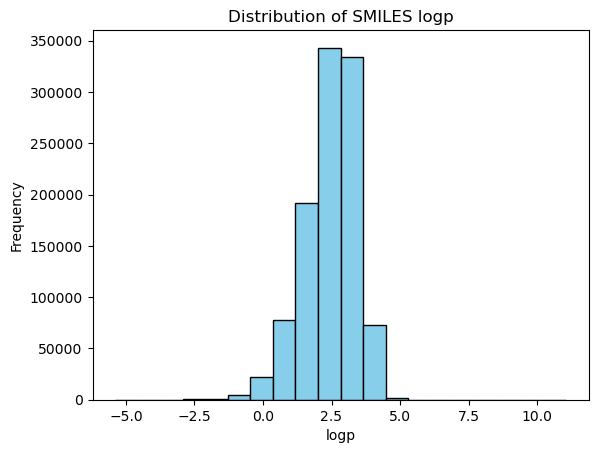

In [2]:
import pandas as pd
from rdkit import Chem

import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
# 从CSV文件中读取数据
df = pd.read_csv('Inhibitor1368_mose_data/merged_file.csv')

# 显示数据的前几行，以确保正确读取
print(df.head())

# 提取SMILES和属性列
mols = df[['SMILES', 'qed', 'logp','molwt','HBA','HBD','TPSA','NumRotBonds','IE', 'Concentration_mM']].values

# 显示提取的SMILES和属性
print("SMILES and Attributes:")
print(mols)
# 提取SMILES列
smiles_logp = df['logp']

plt.hist(smiles_logp, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of SMILES logp')
plt.xlabel('logp')
plt.ylabel('Frequency')
plt.grid(False)

# 保存为PDF文件
plt.savefig('figures/moses_merge_SMILES_logp.pdf', format='pdf', bbox_inches='tight')
plt.show()


                                   SMILES       qed     logp       molwt  HBA  \
0  CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1  0.896898  1.68070  281.083412    3   
1    CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1  0.862259  3.72930  292.097855    4   
2  CC1C2CCC(C2)C1CN(CCO)C(=O)c1ccc(Cl)cc1  0.901948  3.45670  321.149557    2   
3     Cc1c(Cl)cccc1Nc1ncccc1C(=O)OCC(O)CO  0.701022  2.29702  336.087685    6   
4        Cn1cnc2c1c(=O)n(CC(O)CO)c(=O)n2C  0.646083 -2.21310  254.101505    8   

   HBD    TPSA  NumRotBonds  IE  Concentration_mM  
0    2   87.31            3 NaN               NaN  
1    0   44.12            4 NaN               NaN  
2    1   40.54            5 NaN               NaN  
3    3   91.68            6 NaN               NaN  
4    2  102.28            3 NaN               NaN  


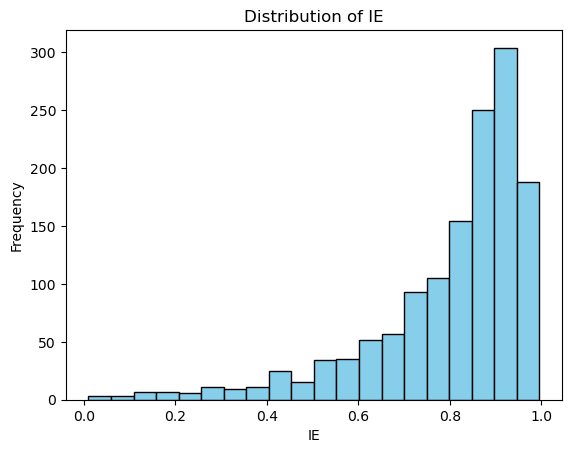

In [9]:
import pandas as pd
from rdkit import Chem

import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
# 从CSV文件中读取数据
df = pd.read_csv('Inhibitor1368_mose_data/merged_file.csv')

# 显示数据的前几行，以确保正确读取
print(df.head())

# 提取SMILES和属性列
mols = df[['SMILES', 'qed', 'logp','molwt','HBA','HBD','TPSA','NumRotBonds','IE', 'Concentration_mM']].values

# 提取SMILES列
smiles_Concentration_mM = df['IE']

plt.hist(smiles_IE, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of IE')
plt.xlabel('IE')
plt.ylabel('Frequency')
plt.grid(False)

# 保存为PDF文件
plt.savefig('figures/moses_merge_SMILES_IE.pdf', format='pdf', bbox_inches='tight')
plt.show()


                                   SMILES       qed     logp       molwt  HBA  \
0  CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1  0.896898  1.68070  281.083412    3   
1    CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1  0.862259  3.72930  292.097855    4   
2  CC1C2CCC(C2)C1CN(CCO)C(=O)c1ccc(Cl)cc1  0.901948  3.45670  321.149557    2   
3     Cc1c(Cl)cccc1Nc1ncccc1C(=O)OCC(O)CO  0.701022  2.29702  336.087685    6   
4        Cn1cnc2c1c(=O)n(CC(O)CO)c(=O)n2C  0.646083 -2.21310  254.101505    8   

   HBD    TPSA  NumRotBonds  IE  Concentration_mM  
0    2   87.31            3 NaN               NaN  
1    0   44.12            4 NaN               NaN  
2    1   40.54            5 NaN               NaN  
3    3   91.68            6 NaN               NaN  
4    2  102.28            3 NaN               NaN  
SMILES and Attributes:
[['CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1' 0.89689831 1.6807 ... 3 nan
  nan]
 ['CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1' 0.862259477 3.7293 ... 4 nan nan]
 ['CC1C2CCC(C2)C1CN(CCO)C

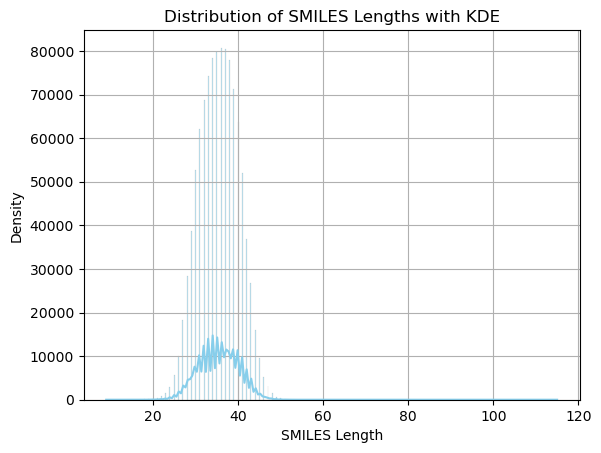

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 从CSV文件中读取数据
df = pd.read_csv('Inhibitor1368_mose_data/merged_file.csv')

# 显示数据的前几行，以确保正确读取
print(df.head())

# 提取SMILES和属性列
mols = df[['SMILES', 'qed', 'logp','molwt','HBA','HBD','TPSA','NumRotBonds','IE', 'Concentration_mM']].values

# 显示提取的SMILES和属性
print("SMILES and Attributes:")
print(mols)
# 提取SMILES列
smiles_column = df['SMILES']

# 计算SMILES长度
smiles_lengths = [len(smiles) for smiles in smiles_column]

# 创建密度分布曲线
sns.histplot(smiles_lengths, kde=True, color='skyblue')
plt.title('Distribution of SMILES Lengths with KDE')
plt.xlabel('SMILES Length')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [20]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math, copy, time
from torch.autograd import Variable
import pandas as pd
from transvae.tvae_util import *  # 导入变分自编码器工具库，可能包含用于处理和准备数据的辅助函数

def vae_data_gen(mols, props, char_dict):
    """
    将输入的SMILES字符串编码为带有标记ID的张量。
    参数：
        mols (np.array, 必需): 包含分子结构的数组
        props (np.array, 必需): 包含标量化学属性值的数组
        char_dict (字典, 必需): 将标记映射到整数ID的字典
    返回：
        encoded_data (torch.tensor): 包含每个SMILES字符串编码的张量
    """
    smiles = mols[:,0]  # 提取SMILES字符串
    if props is None:  # 如果未提供属性，创建一个全零的属性数组
        props = np.zeros(smiles.shape)
    del mols  # 删除原始的分子数组以节省内存
    smiles = [tokenizer(x) for x in smiles]  # 对SMILES字符串进行分词
    encoded_data = torch.empty((len(smiles), 128))  # 创建一个空的编码数据张量
    for j, smi in enumerate(smiles):
        encoded_smi = encode_smiles(smi, 126, char_dict)  # 编码SMILES字符串
        encoded_smi = [0] + encoded_smi  # 在编码前添加起始标记
        encoded_data[j,:-1] = torch.tensor(encoded_smi)  # 填充编码数据张量
        encoded_data[j,-1] = torch.tensor(props[j])  # 添加属性值
    return encoded_data  # 返回编码后的数据

def make_std_mask(tgt, pad):
    """
    为目标输入创建序列掩码矩阵（参考自http://nlp.seas.harvard.edu/2018/04/03/attention.html）
    参数：
        tgt (torch.tensor, 必需): 目标标记ID向量
        pad (int, 必需): 填充标记ID
    返回：
        tgt_mask (torch.tensor): 序列目标掩码
    """
    tgt_mask = (tgt != pad).unsqueeze(-2)  # 创建掩码以隐藏填充标记
    # 通过逻辑与操作合并掩码和后续位置掩码，以确保模型无法看到未来的标记
    tgt_mask = tgt_mask & Variable(subsequent_mask(tgt.size(-1)).type_as(tgt_mask.data))
    return tgt_mask  # 返回目标掩码

# 从CSV文件中读取数据
df = pd.read_csv('Inhibitor1368_mose_data/merged_file.csv')

# 显示数据的前几行，以确保正确读取
print(df.head())

# 提取SMILES和属性列
mols = df[['SMILES', 'qed', 'logp','molwt','HBA','HBD','TPSA','NumRotBonds','IE', 'Concentration_mM']].values

# 显示提取的SMILES和属性
print(mols)

# 提取属性列
props = df[['qed', 'logp','molwt','HBA','HBD','TPSA','NumRotBonds','IE', 'Concentration_mM']].values

# 显示提取的属性
print(props)


                                   SMILES       qed     logp       molwt  HBA  \
0  CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1  0.896898  1.68070  281.083412    3   
1    CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1  0.862259  3.72930  292.097855    4   
2  CC1C2CCC(C2)C1CN(CCO)C(=O)c1ccc(Cl)cc1  0.901948  3.45670  321.149557    2   
3     Cc1c(Cl)cccc1Nc1ncccc1C(=O)OCC(O)CO  0.701022  2.29702  336.087685    6   
4        Cn1cnc2c1c(=O)n(CC(O)CO)c(=O)n2C  0.646083 -2.21310  254.101505    8   

   HBD    TPSA  NumRotBonds  IE  Concentration_mM  
0    2   87.31            3 NaN               NaN  
1    0   44.12            4 NaN               NaN  
2    1   40.54            5 NaN               NaN  
3    3   91.68            6 NaN               NaN  
4    2  102.28            3 NaN               NaN  
[['CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1' 0.89689831 1.6807 ... 3 nan
  nan]
 ['CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1' 0.862259477 3.7293 ... 4 nan nan]
 ['CC1C2CCC(C2)C1CN(CCO)C(=O)c1ccc(Cl)cc1' 0.901

In [1]:
import pickle

# 读取pkl文件
with open('data/char_dict_zinc.pkl', 'rb') as f:
    data = pickle.load(f)

# 打印读取到的内容
print(data)

# 读取pkl文件
with open('data/char_dict_pubchem.pkl', 'rb') as f:
    data = pickle.load(f)

# 打印读取到的内容
print(data)

# 读取pkl文件
with open('Inhibitor1368_mose_data/Inhibitor1368_mose_data_char_dict.pkl', 'rb') as f:
    data = pickle.load(f)

# 打印读取到的内容
print(data)


{'<start>': 0, 'C': 1, 'c': 2, '1': 3, '(': 4, ')': 5, 'N': 6, '=': 7, 'S': 8, '2': 9, 'O': 10, '3': 11, 'F': 12, 'n': 13, 's': 14, '-': 15, 'Cl': 16, '4': 17, '5': 18, '6': 19, 'Br': 20, '[nH]': 21, '#': 22, 'o': 23, '_': 24, '<end>': 25}
{'<start>': 0, 'C': 1, 'c': 2, '1': 3, '(': 4, ')': 5, 'N': 6, '=': 7, 'S': 8, '2': 9, 'O': 10, '3': 11, 'F': 12, 'n': 13, 's': 14, '-': 15, 'Cl': 16, '4': 17, 'Br': 18, '[nH]': 19, '#': 20, '[N+]': 21, '[O-]': 22, 'o': 23, '_': 24, '<end>': 25}
{'<start>': 0, 'S': 1, '7': 2, '-': 3, '/': 4, 'c': 5, '[Br-]': 6, '[NH+]': 7, '[nH+]': 8, '[Na+]': 9, '[C@@]': 10, '[H]': 11, 'I': 12, '[I-]': 13, '.': 14, '[Cl-]': 15, '[O-]': 16, '[C@]': 17, 'O': 18, 'n': 19, 'o': 20, '(': 21, '6': 22, '#': 23, '8': 24, 'Br': 25, 'N': 26, ')': 27, 'P': 28, '1': 29, '[P-]': 30, 's': 31, '[N-]': 32, '[K]': 33, '[N+]': 34, 'C': 35, '=': 36, '_': 37, '[nH]': 38, '5': 39, '4': 40, '[C@@H]': 41, '3': 42, 'Cl': 43, '[C@H]': 44, '\\': 45, '[n+]': 46, 'F': 47, '2': 48, '<end>': 49}

In [3]:
# 第一个词典
dict1 = {'<start>': 0,'2': 1, '/': 2, 'I': 3, '[NH+]': 4, '[N+]': 5, 'Br': 6, 'F': 7, '[Br-]': 8, 'S': 9, '[O-]': 10, 'C': 11, '3': 12, '[P-]': 13, '1': 14, '.': 15, '[N-]': 16, ')': 17, 'n': 18, '[nH+]': 19, 'Cl': 20, '[Na+]': 21, '[I-]': 22, '[C@H]': 23, '(': 24, 'N': 25, '[nH]': 26, '\\': 27, '6': 28, 'P': 29, '7': 30, '8': 31, '-': 32, '[Cl-]': 33, '[C@]': 34, 'o': 35, '[C@@H]': 36, '[n+]': 37, 's': 38, '5': 39, '#': 40, '=': 41, '4': 42, '[K]': 43, '[C@@]': 44, 'O': 45, 'c': 46,'[H]':47,'_':48,'<end>': 49}

# 第二个词典
dict2 = {'<start>': 0, 'o': 1, '[N-]': 2, 's': 3, 'c': 4, '[Cl-]': 5, '3': 6, '#': 7, '[C@]': 8, 'I': 9, '[n+]': 10, '4': 11, '6': 12, '=': 13, 'S': 14, 'P': 15, 'O': 16, '[K]': 17, '[nH]': 18, 'n': 19, 'F': 20, '(': 21, 'Cl': 22, '[O-]': 23, '8': 24, '7': 25, ')': 26, '2': 27, '[Na+]': 28, '[Br-]': 29, '[C@H]': 30, '[P-]': 31, 'C': 32, '[nH+]': 33, '5': 34, '[NH+]': 35, '[C@@H]': 36, '/': 37, '\\': 38, '-': 39, '.': 40, '[I-]': 41, '1': 42, '[N+]': 43, '[C@@]': 44, 'N': 45, 'Br': 46, '_': 47, '<end>': 48}

def merge_dicts(dict1, dict2):
    # 将两个词典的键合并成一个集合
    all_keys = set(dict1.keys()).union(dict2.keys())
    
    # 创建一个新的空词典
    merged_dict = {}
    
    # 为每个键分配一个新的编码
    new_code = 0
    for key in all_keys:
        # 如果key在第一个词典中，则以第一个词典的编码为准
        if key in dict1:
            merged_dict[key] = new_code
            new_code += 1
        # 如果key在第二个词典中，且不在第一个词典中，则以第二个词典的编码为准
        elif key in dict2:
            merged_dict[key] = new_code
            new_code += 1
    
    return merged_dict

# 合并两个词典
char_dict = merge_dicts(dict1, dict2)

# 打印合并后的词典
print(char_dict)
char_dict={'<start>': 0, 'S': 1, '7': 2, '-': 3, '/': 4, 'c': 5, '[Br-]': 6, '[NH+]': 7, '[nH+]': 8, '[Na+]': 9, '[C@@]': 10, '[H]': 11, 'I': 12, '[I-]': 13, '.': 14, '[Cl-]': 15, '[O-]': 16, '[C@]': 17, 'O': 18, 'n': 19, 'o': 20, '(': 21, '6': 22, '#': 23, '8': 24, 'Br': 25, 'N': 26, ')': 27, 'P': 28, '1': 29, '[P-]': 30, 's': 31, '[N-]': 32, '[K]': 33, '[N+]': 34, 'C': 35, '=': 36, '_': 37, '[nH]': 38, '5': 39, '4': 40, '[C@@H]': 41, '3': 42, 'Cl': 43, '[C@H]': 44, '\\': 45, '[n+]': 46, 'F': 47, '2': 48, '<end>': 49}

filename = 'Inhibitor1368_mose_data/Inhibitor1368_mose_data_char_dict.pkl'

# Open a file to save the data
with open(filename, 'wb') as file:
    # Use pickle.dump() to dump the char_dict into the file
    pickle.dump(char_dict, file)

print(f"Character dictionary saved as {filename}.")
# To load the character dictionary from the saved .pkl file
with open('Inhibitor1368_mose_data/Inhibitor1368_mose_data_char_dict.pkl', 'rb') as file:
    loaded_char_dict = pickle.load(file)

print(loaded_char_dict)


{'[Cl-]': 0, '3': 1, 'S': 2, '6': 3, '_': 4, 'o': 5, '[nH+]': 6, '[P-]': 7, '[C@@H]': 8, 'n': 9, '[I-]': 10, 'N': 11, '.': 12, 'Cl': 13, 'Br': 14, '-': 15, '[C@@]': 16, '/': 17, '[nH]': 18, 'F': 19, 'I': 20, '#': 21, '=': 22, '4': 23, '[O-]': 24, 'C': 25, '7': 26, '1': 27, '\\': 28, 's': 29, '[C@]': 30, '(': 31, '[K]': 32, '<end>': 33, '<start>': 34, '5': 35, '[N+]': 36, 'c': 37, '[H]': 38, '[NH+]': 39, ')': 40, 'O': 41, '2': 42, '8': 43, '[Na+]': 44, '[Br-]': 45, '[C@H]': 46, '[N-]': 47, '[n+]': 48, 'P': 49}
Character dictionary saved as Inhibitor1368_mose_data/Inhibitor1368_mose_data_char_dict.pkl.
{'<start>': 0, 'S': 1, '7': 2, '-': 3, '/': 4, 'c': 5, '[Br-]': 6, '[NH+]': 7, '[nH+]': 8, '[Na+]': 9, '[C@@]': 10, '[H]': 11, 'I': 12, '[I-]': 13, '.': 14, '[Cl-]': 15, '[O-]': 16, '[C@]': 17, 'O': 18, 'n': 19, 'o': 20, '(': 21, '6': 22, '#': 23, '8': 24, 'Br': 25, 'N': 26, ')': 27, 'P': 28, '1': 29, '[P-]': 30, 's': 31, '[N-]': 32, '[K]': 33, '[N+]': 34, 'C': 35, '=': 36, '_': 37, '[nH]'

In [23]:
import pandas as pd
import re
import pickle
# 读取SMILES分子文件
smiles_df = pd.read_csv("Inhibitor1368_mose_data/merged_file.csv", header=None, names=["SMILES"])

# 将SMILES字符串连接成一个长字符串
all_smiles = ''.join(smiles_df['SMILES'])

# 定义模式pattern
pattern = "(\[[^\]]+]|Br?|Cl?|N|O|S|P|F|I|b|c|n|o|H|s|p|\(|\)|\.|=|#|-|\+|\\\\|\/|_|:|~|@|\?|>|\*|\$|\%[0-9]{2}|[0-9])"

# 使用findall函数找到所有匹配的字符
matched_characters = re.findall(pattern, all_smiles)

# 去除重复字符并建立字符词典
char_dict = {char: idx+1 for idx, char in enumerate(set(matched_characters))}

# 打印字符词典
print(char_dict)

#char_dict={'<start>': 0,'2': 1, '/': 2, 'I': 3, '[NH+]': 4, '[N+]': 5, 'Br': 6, 'F': 7, '[Br-]': 8, 'S': 9, '[O-]': 10, 'C': 11, '3': 12, '[P-]': 13, '1': 14, '.': 15, '[N-]': 16, ')': 17, 'n': 18, '[nH+]': 19, 'Cl': 20, '[Na+]': 21, '[I-]': 22, '[C@H]': 23, '(': 24, 'N': 25, '[nH]': 26, '\\': 27, '6': 28, 'P': 29, '7': 30, '8': 31, '-': 32, '[Cl-]': 33, '[C@]': 34, 'o': 35, '[C@@H]': 36, '[n+]': 37, 's': 38, '5': 39, '#': 40, '=': 41, '4': 42, '[K]': 43, '[C@@]': 44, 'O': 45, 'c': 46,'[H]':47,'_':48,'<end>': 49}
#print(char_dict)
#org_dict=build_org_dict(char_dict)
#print(org_dict)

# Specify the name of the pkl file
filename = 'Inhibitor1368_mose_data/Inhibitor1368_mose_data_char_dict.pkl'

# Open a file to save the data
with open(filename, 'wb') as file:
    # Use pickle.dump() to dump the char_dict into the file
    pickle.dump(char_dict, file)

print(f"Character dictionary saved as {filename}.")
# To load the character dictionary from the saved .pkl file
with open('Inhibitor1368_mose_data/Inhibitor1368_mose_data_char_dict.pkl', 'rb') as file:
    loaded_char_dict = pickle.load(file)

print(loaded_char_dict)


<>:11: SyntaxWarning: invalid escape sequence '\['
<>:11: SyntaxWarning: invalid escape sequence '\['
C:\Users\DELL\AppData\Local\Temp\ipykernel_25284\2147660628.py:11: SyntaxWarning: invalid escape sequence '\['
  pattern = "(\[[^\]]+]|Br?|Cl?|N|O|S|P|F|I|b|c|n|o|H|s|p|\(|\)|\.|=|#|-|\+|\\\\|\/|_|:|~|@|\?|>|\*|\$|\%[0-9]{2}|[0-9])"
C:\Users\DELL\AppData\Local\Temp\ipykernel_25284\2147660628.py:5: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  smiles_df = pd.read_csv("Inhibitor1368_mose_data/merged_file.csv", header=None, names=["SMILES"])


TypeError: sequence item 1: expected str instance, float found

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



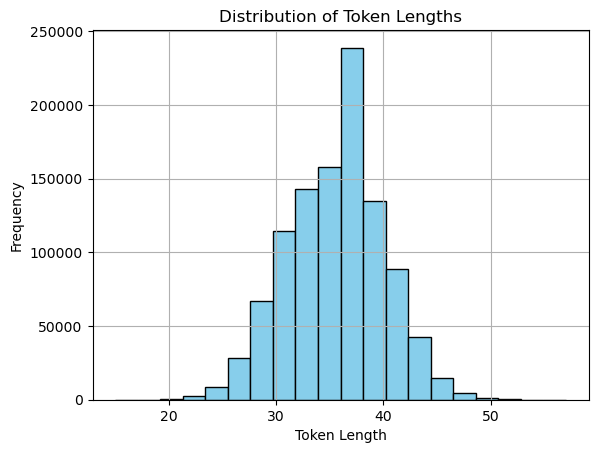

In [8]:
import pandas as pd
from rdkit import Chem
import matplotlib.pyplot as plt

# 从CSV文件中读取数据
df = pd.read_csv('moses_data/moses2.csv')

# 提取SMILES列
smiles_column = df['SMILES']

# 定义词典
token_dict = {'<start>': 0, 'o': 1, '[N-]': 2, 's': 3, 'c': 4, '[Cl-]': 5, '3': 6, '#': 7, '[C@]': 8, 'I': 9, '[n+]': 10, '4': 11, '6': 12, '=': 13, 'S': 14, 'P': 15, 'O': 16, '[K]': 17, '[nH]': 18, 'n': 19, 'F': 20, '(': 21, 'Cl': 22, '[O-]': 23, '8': 24, '7': 25, ')': 26, '2': 27, '[Na+]': 28, '[Br-]': 29, '[C@H]': 30, '[P-]': 31, 'C': 32, '[nH+]': 33, '5': 34, '[NH+]': 35, '[C@@H]': 36, '/': 37, '\\': 38, '-': 39, '.': 40, '[I-]': 41, '1': 42, '[N+]': 43, '[C@@]': 44, 'N': 45, 'Br': 46, '_': 47, '<end>': 48}

# 将SMILES字符串转换为token序列
def smiles_to_tokens(smiles):
    tokens = []
    for char in smiles:
        if char in token_dict.values():
            tokens.append(char)
        else:
            tokens.append('[UNK]')  # 如果字符不在词典中，用'[UNK]'表示未知token
    return tokens

# 计算每个分子的token数量
token_lengths = [len(smiles_to_tokens(smiles)) for smiles in smiles_column]
print(token_lengths)
print(max(token_lengths))
# 绘制token数量的分布图
plt.hist(token_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.grid(True)

# 保存为PDF文件
plt.savefig('figures/moses_Token_Length.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [34]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math, copy, time
from torch.autograd import Variable
import pandas as pd
from transvae.tvae_util import *  # 导入变分自编码器工具库，可能包含用于处理和准备数据的辅助函数

def vae_data_gen(mols, props, char_dict):
    """
    将输入的SMILES字符串编码为带有标记ID的张量。
    参数：
        mols (np.array, 必需): 包含分子结构的数组
        props (np.array, 必需): 包含标量化学属性值的数组
        char_dict (字典, 必需): 将标记映射到整数ID的字典
    返回：
        encoded_data (torch.tensor): 包含每个SMILES字符串编码的张量
    """
    smiles = mols[:,0]  # 提取SMILES字符串
    if props is None:  # 如果未提供属性，创建一个全零的属性数组
        props = np.zeros(smiles.shape)
    del mols  # 删除原始的分子数组以节省内存
    smiles = [tokenizer(x) for x in smiles]  # 对SMILES字符串进行分词
    #print(smiles)
    print(len(smiles))
    encoded_data = torch.empty((len(smiles), 224))  # 创建一个空的编码数据张量
    #print(encoded_data)
    for j, smi in enumerate(smiles):
        encoded_smi = encode_smiles(smi, 222, char_dict)  # 编码SMILES字符串
        encoded_smi = [0] + encoded_smi  # 在编码前添加起始标记
        encoded_data[j,:-1] = torch.tensor(encoded_smi)  # 填充编码数据张量
       # encoded_data[j,-1] = torch.tensor(props[j])  # 添加属性值
       # print("encoded_data shape:", encoded_data.shape)
       # print("props[j] shape:", props[j].shape)
        encoded_data[j,-1] = torch.tensor(props[j][0], dtype=torch.float)  # 将第一个属性值转换为张量，并添加到encoded_data张量的最后一列中
        encoded_data[j,-2] = torch.tensor(props[j][1], dtype=torch.float)  # 将第二个属性值转换为张量，并添加到encoded_data张量的倒数第二列中
        encoded_data[j,-3] = torch.tensor(props[j][2], dtype=torch.float)
        encoded_data[j,-4] = torch.tensor(props[j][3], dtype=torch.float)
        encoded_data[j,-5] = torch.tensor(props[j][4], dtype=torch.float)
        encoded_data[j,-6] = torch.tensor(props[j][5], dtype=torch.float)
        encoded_data[j,-7] = torch.tensor(props[j][6], dtype=torch.float)
        encoded_data[j,-8] = torch.tensor(props[j][7], dtype=torch.float)
    return encoded_data  # 返回编码后的数据


# 从CSV文件中读取数据
df = pd.read_csv('Inhibitor1368_mose_data/merged_file.csv')

# 显示数据的前几行，以确保正确读取
print(df.head())

# 提取SMILES和属性列
mols = df[['SMILES', 'qed', 'logp','molwt','HBA','HBD','TPSA','NumRotBonds','IE', 'Concentration_mM']].values

# 显示提取的SMILES和属性
print("mols:",mols)

# 提取属性列
props = df[['qed', 'logp','molwt','HBA','HBD','TPSA','NumRotBonds','IE', 'Concentration_mM']].values

# 显示提取的属性
print("props:",props)
print("props's shape:",props.shape)
char_dict={'<start>': 0, 'S': 1, '7': 2, '-': 3, '/': 4, 'c': 5, '[Br-]': 6, '[NH+]': 7, '[nH+]': 8, '[Na+]': 9, '[C@@]': 10, '[H]': 11, 'I': 12, '[I-]': 13, '.': 14, '[Cl-]': 15, '[O-]': 16, '[C@]': 17, 'O': 18, 'n': 19, 'o': 20, '(': 21, '6': 22, '#': 23, '8': 24, 'Br': 25, 'N': 26, ')': 27, 'P': 28, '1': 29, '[P-]': 30, 's': 31, '[N-]': 32, '[K]': 33, '[N+]': 34, 'C': 35, '=': 36, '_': 37, '[nH]': 38, '5': 39, '4': 40, '[C@@H]': 41, '3': 42, 'Cl': 43, '[C@H]': 44, '\\': 45, '[n+]': 46, 'F': 47, '2': 48, '<end>': 49}
encoded_data=vae_data_gen(mols, props, char_dict)
print(encoded_data)


                                   SMILES       qed     logp       molwt  HBA  \
0  CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1  0.896898  1.68070  281.083412    3   
1    CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1  0.862259  3.72930  292.097855    4   
2  CC1C2CCC(C2)C1CN(CCO)C(=O)c1ccc(Cl)cc1  0.901948  3.45670  321.149557    2   
3     Cc1c(Cl)cccc1Nc1ncccc1C(=O)OCC(O)CO  0.701022  2.29702  336.087685    6   
4        Cn1cnc2c1c(=O)n(CC(O)CO)c(=O)n2C  0.646083 -2.21310  254.101505    8   

   HBD    TPSA  NumRotBonds  IE  Concentration_mM  
0    2   87.31            3 NaN               NaN  
1    0   44.12            4 NaN               NaN  
2    1   40.54            5 NaN               NaN  
3    3   91.68            6 NaN               NaN  
4    2  102.28            3 NaN               NaN  
mols: [['CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1' 0.89689831 1.6807 ... 3 nan
  nan]
 ['CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1' 0.862259477 3.7293 ... 4 nan nan]
 ['CC1C2CCC(C2)C1CN(CCO)C(=O)c1ccc(Cl)cc1'

In [47]:

def make_std_mask(tgt, pad):
    """
    为目标输入创建序列掩码矩阵（参考自http://nlp.seas.harvard.edu/2018/04/03/attention.html）
    参数：
        tgt (torch.tensor, 必需): 目标标记ID向量
        pad (int, 必需): 填充标记ID
    返回：
        tgt_mask (torch.tensor): 序列目标掩码
    """
    tgt_mask = (tgt != pad).unsqueeze(-2)  # 创建掩码以隐藏填充标记
    # 通过逻辑与操作合并掩码和后续位置掩码，以确保模型无法看到未来的标记
    tgt_mask = tgt_mask & Variable(subsequent_mask(tgt.size(-1)).type_as(tgt_mask.data))
    return tgt_mask  # 返回目标掩码
tgt_mask=make_std_mask(encoded_data,47)
print(tgt_mask.shape)

torch.Size([1368, 224, 224])


In [35]:
#划分测试集训练集
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data from CSV file
data = pd.read_csv("Inhibitor1368_mose_data/merged_file.csv")

# Split the data into train, test, and validation sets (80%, 10%, 10% respectively)
train_data, temp_data = train_test_split(data, test_size=0.2, random_state=42)
test_data, val_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Save each set as CSV files
train_data.to_csv("Inhibitor1368_mose_data/merged_file_train_data.csv", index=False)
test_data.to_csv("Inhibitor1368_mose_data/merged_file_test_data.csv", index=False)
val_data.to_csv("Inhibitor1368_mose_data/merged_file_val_data.csv", index=False)

print("Data split and saved successfully.")


Data split and saved successfully.


In [1]:
#model train
### Prepare data iterators
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math, copy, time
from torch.autograd import Variable
import pandas as pd
from transvae.tvae_util import *  # 导入变分自编码器工具库，可能包含用于处理和准备数据的辅助函数

def vae_data_gen(mols, props, char_dict):
    """
    将输入的SMILES字符串编码为带有标记ID的张量。
    参数：
        mols (np.array, 必需): 包含分子结构的数组
        props (np.array, 必需): 包含标量化学属性值的数组
        char_dict (字典, 必需): 将标记映射到整数ID的字典
    返回：
        encoded_data (torch.tensor): 包含每个SMILES字符串编码的张量
    """
    smiles = mols[:,0]  # 提取SMILES字符串
    if props is None:  # 如果未提供属性，创建一个全零的属性数组
        props = np.zeros(smiles.shape)
    del mols  # 删除原始的分子数组以节省内存
    smiles = [tokenizer(x) for x in smiles]  # 对SMILES字符串进行分词
    #print(smiles)
    print(len(smiles))
    encoded_data = torch.empty((len(smiles), 224))  # 创建一个空的编码数据张量
    #print(encoded_data)
    for j, smi in enumerate(smiles):
        encoded_smi = encode_smiles(smi, 222, char_dict)  # 编码SMILES字符串
        encoded_smi = [0] + encoded_smi  # 在编码前添加起始标记
        encoded_data[j,:-1] = torch.tensor(encoded_smi)  # 填充编码数据张量
       # encoded_data[j,-1] = torch.tensor(props[j])  # 添加属性值
       # print("encoded_data shape:", encoded_data.shape)
       # print("props[j] shape:", props[j].shape)
        encoded_data[j,-1] = torch.tensor(props[j][0], dtype=torch.float)  # 将第一个属性值转换为张量，并添加到encoded_data张量的最后一列中
        encoded_data[j,-2] = torch.tensor(props[j][1], dtype=torch.float)  # 将第二个属性值转换为张量，并添加到encoded_data张量的倒数第二列中
    return encoded_data  # 返回编码后的数据


# 从CSV文件中读取训练集数据
df_train = pd.read_csv('Inhibitor1368_mose_data/merged_file_train_data.csv')
# 显示数据的前几行，以确保正确读取
#print(df_train.head())
# 提取SMILES和属性列
#train_mols = df_train[['SMILES', 'IE', 'Concentration_mM']].values


# 合并列为一个字符串列
train_mols_str = df_train.apply(lambda x: f"{x['SMILES']}", axis=1)

# 保存到TXT文件
np.savetxt('Inhibitor1368_mose_data/train_mols.txt', train_mols_str.values, fmt='%s')

# 显示提取的SMILES和属性
#print("mols:",train_mols)
# 提取属性列
train_props = df_train[['qed', 'logp','molwt','HBA','HBD','TPSA','NumRotBonds','IE', 'Concentration_mM']].values
# 显示提取的属性
print("props:",train_props)
# 使用 np.savetxt 保存数组，指定格式为字符串
np.savetxt('Inhibitor1368_mose_data/train_props.txt', train_props, fmt='%s', delimiter='\t ')

# 从CSV文件中读取测试集数据
df_test = pd.read_csv('Inhibitor1368_mose_data/merged_file_test_data.csv')
# 显示数据的前几行，以确保正确读取
#print(df_train.head())
# 提取SMILES和属性列
#train_mols = df_train[['SMILES', 'IE', 'Concentration_mM']].values
# 合并列为一个字符串列
test_mols_str = df_test.apply(lambda x: f"{x['SMILES']}", axis=1)
# 保存到TXT文件
np.savetxt('Inhibitor1368_mose_data/test_mols.txt', test_mols_str.values, fmt='%s')
# 显示提取的SMILES和属性
#print("mols:",train_mols)
# 提取属性列
test_props = df_test[['qed', 'logp','molwt','HBA','HBD','TPSA','NumRotBonds','IE', 'Concentration_mM']].values
# 显示提取的属性
#print("props:",test_props)
# 使用 np.savetxt 保存数组，指定格式为字符串
np.savetxt('Inhibitor1368_mose_data/test_props.txt', test_props, fmt='%s', delimiter='\t ')

# 从CSV文件中读取验证集数据
df_val = pd.read_csv('Inhibitor1368_mose_data/merged_file_val_data2.csv')
# 合并列为一个字符串列
val_mols_str = df_val.apply(lambda x: f"{x['SMILES']}", axis=1)
# 保存到TXT文件
np.savetxt('Inhibitor1368_mose_data/val_mols2.txt', val_mols_str.values, fmt='%s')
# 提取属性列
val_props = df_val[['qed', 'logp','molwt','HBA','HBD','TPSA','NumRotBonds','IE', 'Concentration_mM']].values
# 显示提取的属性
#print("props:",test_props)
# 使用 np.savetxt 保存数组，指定格式为字符串
np.savetxt('Inhibitor1368_mose_data/val_props2.txt', val_props, fmt='%s', delimiter='\t ')


props: [[  0.88700159   2.9328     284.1524779  ...   6.                  nan
           nan]
 [  0.72278183   2.2471     311.1269914  ...   5.                  nan
           nan]
 [  0.69241604   2.69942    285.100108   ...   4.                  nan
           nan]
 ...
 [  0.80641917   2.1644     301.1538748  ...   3.                  nan
           nan]
 [  0.87030744   3.02524    313.179027   ...   4.                  nan
           nan]
 [  0.78750875   1.6725     332.1306969  ...   6.                  nan
           nan]]


In [37]:
"""
def get_char_weights(train_smiles, params, freq_penalty=0.5):
    "Calculates token weights for a set of input data"
    char_dist = {}
    char_counts = np.zeros((params['NUM_CHAR'],))
    char_weights = np.zeros((params['NUM_CHAR'],))
    for k in params['CHAR_DICT'].keys():
        char_dist[k] = 0
    for smile in train_smiles:
        for i, char in enumerate(smile):
            char_dist[char] += 1
        for j in range(i, params['MAX_LENGTH']):
            char_dist['_'] += 1
    for i, v in enumerate(char_dist.values()):
        char_counts[i] = v
    top = np.sum(np.log(char_counts))
    for i in range(char_counts.shape[0]):
        char_weights[i] = top / np.log(char_counts[i])
    min_weight = char_weights.min()
    for i, w in enumerate(char_weights):
        if w > 2*min_weight:
            char_weights[i] = 2*min_weight
    scaler = MinMaxScaler([freq_penalty,1.0])
    char_weights = scaler.fit_transform(char_weights.reshape(-1, 1))
    return char_weights[:,0]
"""
def get_char_weights(train_smiles, params, freq_penalty=0.5):
    """
    Calculates token weights for a set of input SMILES data, correctly handling special multi-character tokens (e.g., "Cl", "Br", and bracketed groups).

    Parameters:
    - train_smiles: list of SMILES strings to analyze
    - params: dictionary containing CHAR_DICT, NUM_CHAR, MAX_LENGTH
    - freq_penalty: minimum scale value for the weights

    Returns:
    - char_weights: numpy array of character weights
    """
    # Initialize dictionaries to count occurrences of each character/token
    char_dist = {k: 0 for k in params['CHAR_DICT'].keys()}
    char_counts = np.zeros((params['NUM_CHAR'],))
    char_weights = np.zeros((params['NUM_CHAR'],))
    
    # Count occurrences of each character/token
    for smile in train_smiles:
        i = 0
        while i < len(smile):
            # Detecting bracketed multi-character tokens
            if smile[i] == '[':  
                end_idx = smile.find(']', i) + 1
                element = smile[i:end_idx]
                i = end_idx
            # Handling specific two-character elements
            elif (i + 1 < len(smile)) and (smile[i:i+2] in ['Cl', 'Br']):
                element = smile[i:i+2]
                i += 2
            else:
                element = smile[i]
                i += 1
            
            if element in char_dist:
                char_dist[element] += 1
            else:
                print(f"Unknown element: {element}")  # Optional: handle or log unknown elements
    
    # Convert char_dist counts to char_counts array
    for i, k in enumerate(params['CHAR_DICT'].keys()):
        char_counts[i] = char_dist.get(k, 0)
    
    # Calculate initial weights based on log frequency
    total_log_count = np.sum(np.log(char_counts[char_counts > 0]))  # Avoid log(0)
    char_weights = total_log_count / np.log(char_counts, out=np.zeros_like(char_counts), where=(char_counts!=0))
    
    # Apply a cap to weights to reduce the impact of rare tokens
    min_weight = np.min(char_weights[char_weights > 0])  # Ignore zero weights
    char_weights[char_weights > 2 * min_weight] = 2 * min_weight
    
    # Normalize weights to be in the range [freq_penalty, 1.0]
    scaler = MinMaxScaler(feature_range=(freq_penalty, 1.0))
    char_weights = scaler.fit_transform(char_weights.reshape(-1, 1)).flatten()
    
    return char_weights

import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data from CSV file
data = pd.read_csv("Inhibitor1368_mose_data/merged_file.csv")
# 合并列为一个字符串列
mols_str = df_train.apply(lambda x: f"{x['SMILES']}", axis=1)
params = {
    'CHAR_DICT': {'S': 1, '7': 2, '-': 3, '/': 4, 'c': 5, '[Br-]': 6, '[NH+]': 7, '[nH+]': 8, '[Na+]': 9, '[C@@]': 10, '[H]': 11, 'I': 12, '[I-]': 13, '.': 14, '[Cl-]': 15, '[O-]': 16, '[C@]': 17, 'O': 18, 'n': 19, 'o': 20, '(': 21, '6': 22, '#': 23, '8': 24, 'Br': 25, 'N': 26, ')': 27, 'P': 28, '1': 29, '[P-]': 30, 's': 31, '[N-]': 32, '[K]': 33, '[N+]': 34, 'C': 35, '=': 36, '_': 37, '[nH]': 38, '5': 39, '4': 40, '[C@@H]': 41, '3': 42, 'Cl': 43, '[C@H]': 44, '\\': 45, '[n+]': 46, 'F': 47, '2': 48, '<end>': 49},  # 假设字符字典
    'NUM_CHAR': 49,  # 字符总数
    'MAX_LENGTH': 128  # 假设的最大SMILES长度
}
char_weights_moses_data=get_char_weights(mols_str, params, freq_penalty=0.5)
np.save("Inhibitor1368_mose_data/char_weights_Inhibitor1368_mose_data.npy",char_weights_moses_data)
char_weights_moses_data=np.load("Inhibitor1368_mose_data/char_weights_Inhibitor1368_mose_data.npy")
print(char_weights_moses_data)

[0.6537413  1.         0.66688192 1.         0.5        1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.55062481
 0.57137807 0.67327293 0.53365653 1.         0.71537848 1.
 0.76734659 0.56584641 0.53365653 1.         0.54079932 1.
 0.66437905 1.         1.         1.         0.51294291 0.56454337
 1.         0.69739456 1.         0.75004155 1.         0.61357204
 0.68285991 1.         1.         1.         0.64365702 0.55963258
 1.        ]


C:\Users\DELL\AppData\Local\Temp\ipykernel_25284\1321649712.py:72: RuntimeWarning: divide by zero encountered in divide
  char_weights = total_log_count / np.log(char_counts, out=np.zeros_like(char_counts), where=(char_counts!=0))


In [ ]:
python train.py --model transvae --data_source custom --train_mols_path Inhibitor1368_mose_data/train_mols.txt --test_mols_path Inhibitor1368_mose_data/test_mols.txt --train_props_path Inhibitor1368_mose_data/train_props.txt --test_props_path Inhibitor1368_mose_data/test_props.txt --epochs 100 --vocab_path Inhibitor1368_mose_data/Inhibitor1368_mose_data_char_dict.pkl --char_weights_path Inhibitor1368_mose_data/char_weights_Inhibitor1368_mose_data.npy --save_name Inhibitor1368_mose_model

In [33]:
char_weights_pubchem=np.load("data/char_weights_pubchem.npy")
print(char_weights_pubchem)

[0.61319926 0.61182841 0.68132406 0.65523054 0.65523054 0.71474472
 0.71347161 0.84944348 0.71109092 0.68981411 0.77738737 0.81256274
 0.753732   0.90777666 0.87654468 0.86077208 0.89456024 0.93787499
 0.9497201  0.96022365 0.9988372  1.         0.94070945 0.1
 0.75      ]


In [ ]:
python train.py --model transvae --data_source custom --train_mols_path Inhibitor1368_data/train_mols.txt --test_mols_path Inhibitor1368_data/test_mols.txt --train_props_path Inhibitor1368_data/train_props.txt --test_props_path Inhibitor1368_data/test_props.txt --vocab_path Inhibitor1368_data/inhibitor_char_dict.pkl --char_weights_path Inhibitor1368_data/char_weights_Inhibitor1368.npy --save_name my_inhibitor_1368_model

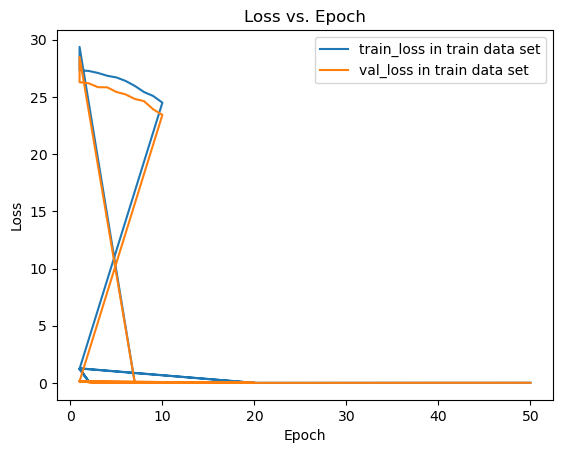

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['ps.fonttype']=42
# 读取数据
data = []
with open("trials/train_val_loss_file.txt", "r") as file:
    for line in file:
        data.append([float(x) for x in line.strip().split()])

# 提取数据
epochs = [row[0] for row in data]
train_loss = [row[1] for row in data]
val_loss = [row[2] for row in data]

# 绘制曲线图
plt.plot(epochs, train_loss, label='train_loss in train data set')
plt.plot(epochs, val_loss, label='val_loss in train data set')

# 添加图例和标签
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')

# 保存为PDF文件
plt.savefig('figures/log_Inhibitor1368_mose_9_model_train_val_loss_plot.pdf', format='pdf', bbox_inches='tight')

# 显示图形
plt.show()


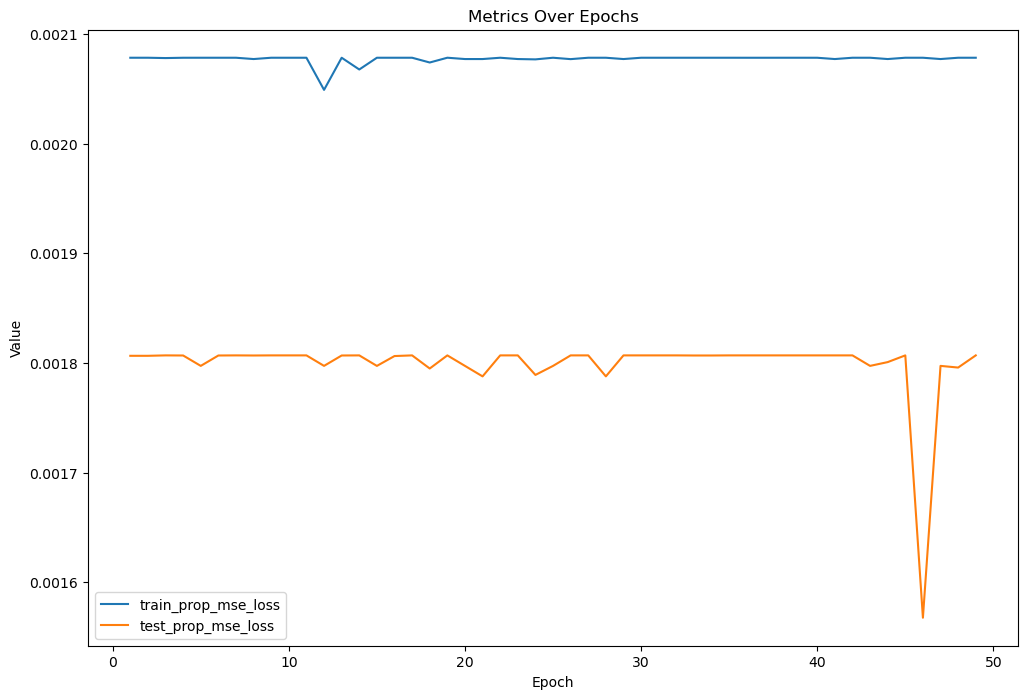

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['ps.fonttype']=42
# 读取txt文件并解析数据
def read_txt_file1(filename):
    data = {
        'epoch': [],
        'batch_idx': [],
        'data_type': [],
        'tot_loss': [],
        'recon_loss': [],
        'pred_loss': [],
        'kld_loss': [],
        'prop_mse_loss': [],
        'run_time': []
    }
    with open(filename, 'r') as file:
        next(file)  # 跳过文件头
        for line in file:
            parts = line.strip().split()
            if len(parts) == 9:  # 确保行有足够的部分
                epoch, batch_idx, data_type, tot_loss, recon_loss, pred_loss, kld_loss, prop_mse_loss, run_time = parts
                data['epoch'].append(int(epoch))
                data['batch_idx'].append(int(batch_idx))
                data['data_type'].append(data_type)
                data['tot_loss'].append(float(tot_loss))
                data['recon_loss'].append(float(recon_loss))
                data['pred_loss'].append(float(pred_loss))
                data['kld_loss'].append(float(kld_loss))
                data['prop_mse_loss'].append(float(prop_mse_loss))
                data['run_time'].append(float(run_time))
            else:
                print(f"Skipping malformed line: {line.strip()}")  # 输出提示信息
    return data


def read_txt_file(filename):
    data = {'epoch': [], 'batch_idx': [], 'data_type':[],'tot_loss': [], 'recon_loss': [],
            'pred_loss': [], 'kld_loss': [], 'prop_mse_loss': [], 'run_time': []}
    
    with open(filename, 'r') as file:
        next(file)  # 跳过文件头
        for line in file:
            epoch, batch_idx, data_type, tot_loss, recon_loss, pred_loss, kld_loss, prop_mse_loss, run_time = line.strip().split()
            data['epoch'].append(int(epoch))
            data['batch_idx'].append(int(batch_idx))
            data['data_type'].append(str(data_type))
            data['tot_loss'].append(float(tot_loss))
            data['recon_loss'].append(float(recon_loss))
            data['pred_loss'].append(float(pred_loss))
            data['kld_loss'].append(float(kld_loss))
            data['prop_mse_loss'].append(float(prop_mse_loss))
            data['run_time'].append(float(run_time))
    
    return data

def read_test_txt_file(filename):
    data = {'epoch': [], 'batch_idx': [], 'data_type':[],'tot_loss': [], 'recon_loss': [],
            'pred_loss': [], 'kld_loss': [], 'prop_mse_loss': []}
    
    with open(filename, 'r') as file:
        next(file)  # 跳过文件头
        for line in file:
            epoch, batch_idx, data_type, tot_loss, recon_loss, pred_loss, kld_loss, prop_mse_loss = line.strip().split()
            data['epoch'].append(int(epoch))
            data['batch_idx'].append(int(batch_idx))
            data['data_type'].append(str(data_type))
            data['tot_loss'].append(float(tot_loss))
            data['recon_loss'].append(float(recon_loss))
            data['pred_loss'].append(float(pred_loss))
            data['kld_loss'].append(float(kld_loss))
            data['prop_mse_loss'].append(float(prop_mse_loss))
    
    return data
    
# 计算每个epoch的平均值
def calculate_epoch_means(data):
    epochs = max(data['epoch'])
    means = {'epoch': [], 'tot_loss': [], 'recon_loss': [], 'pred_loss': [],
             'kld_loss': [], 'prop_mse_loss': []}
    
    for epoch in range(1, epochs + 1):
        epoch_data = {key: [] for key in data.keys()}
        for i in range(len(data['epoch'])):
            if data['epoch'][i] == epoch:
                for key in data.keys():
                    epoch_data[key].append(data[key][i])
        
        means['epoch'].append(epoch)
        for key in ['tot_loss', 'recon_loss', 'pred_loss', 'kld_loss', 'prop_mse_loss']:
            means[key].append(np.mean(epoch_data[key]))
    
    return means

# 绘制指标随epoch的变化曲线
def plot_metrics(train_means,test_means):
    epochs = train_means['epoch']
    plt.figure(figsize=(12, 8))
    plt.plot(epochs, train_means['prop_mse_loss'], label='train_prop_mse_loss')
    plt.plot(epochs, test_means['prop_mse_loss'], label='test_prop_mse_loss')
    #plt.plot(epochs, means['recon_loss'], label='recon_loss')
    #plt.plot(epochs, means['pred_loss'], label='pred_loss')
    #plt.plot(epochs, means['kld_loss'], label='kld_loss')
    #plt.plot(epochs, means['prop_mse_loss'], label='prop_mse_loss')
    #plt.plot(epochs, means['run_time'], label='run_time')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Metrics Over Epochs')
    plt.legend()
    #plt.grid(True)
    # 保存为PDF文件
    plt.savefig('figures/train__rnnattn_Inhibitor1368_mose_9_train_val_prop_mse_loss_plot.pdf', format='pdf', bbox_inches='tight')

    plt.show()


train_filename = 'trials/train_log_rnnattn_Inhibitor1368_mose_model.txt'  # 修改为你的txt文件路径
train_data = read_txt_file(train_filename)
train_means = calculate_epoch_means(train_data)

test_filename = 'trials/test_log_rnnattn_Inhibitor1368_mose_model.txt'  # 修改为你的txt文件路径
test_data = read_test_txt_file(test_filename)
test_means = calculate_epoch_means(test_data)

plot_metrics(train_means,test_means)


In [1]:
#验证模型生成分子效果
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

from transvae.trans_models import TransVAE
from transvae.rnn_models import RNN, RNNAttn
from transvae.tvae_util import *
%load_ext autoreload
%autoreload 2

import IPython.display as Disp
np.set_printoptions(suppress=True)
# Load model and set of SMILES
vae = TransVAE(load_fn='checkpoints/best_Inhibitor1368_mose_model.ckpt')
smiles_data = pd.read_csv('Inhibitor1368_mose_data/val_mols3.txt', sep='\t', header=None)
smiles = smiles_data.iloc[:, 0].to_numpy()
#smiles_data = pd.read_csv('Inhibitor1368_data/val_mols.txt').to_numpy()
#smiles = smiles_data[:,0]
smiles = smiles.reshape(-1, 1)
print(smiles.shape)
props_data = pd.read_csv('Inhibitor1368_mose_data/val_props3.txt', sep='\t', header=None, usecols=[0,1,2,3,4,5,6,7,8])
    # 转换为NumPy数组
props = props_data.to_numpy()
print(props.shape)
#print(props)
vae.params['BATCH_SIZE'] = 20
reconstructed_smiles = vae.reconstruct(data=smiles,props=props, method='greedy', log=True, return_mems=True, return_str=True)
for og_smi, reconstructed_smi in zip(smiles, reconstructed_smiles):
    print('{} <- Original'.format(og_smi))
    print('{} <- Reconstruction'.format(reconstructed_smi))
    print('\n')

self.src_len: 126
(2, 1)
(2, 9)
2
['CCCCCCCCCCCC[N+](C)(C)c1ccc(/C=N/c2cn(C)n(-c3ccccc3)c2=O)cc1.[Br-]'] <- Original
[] <- Reconstruction


['c1ccc2c(c1)OCCOCCOCCOc1ccccc1-c1nnc-2s1'] <- Original
[[-0.          0.         -0.03811966 -0.08276751  0.13722368  0.0939382
  -0.07219478 -0.00148715  0.10282226 -0.08783764 -0.1476146   0.1266609
   0.04828428  0.04934609  0.07315011 -0.15058811  0.01272772 -0.0617428
  -0.03285305 -0.11244161  0.07543324  0.06271563  0.04184937  0.04713392
   0.07392077 -0.133978    0.09207956 -0.05977533  0.02976908  0.01398328
  -0.08833858  0.03745806  0.0017741   0.0139953  -0.07771724 -0.12885049
  -0.14605393 -0.13439794  0.02917884  0.0457131   0.09652677  0.05530873
   0.08830985  0.12758009  0.06870081 -0.11890057 -0.11012347 -0.07930747
  -0.05341548  0.01262027  0.11819784  0.05702704 -0.08794438  0.10928737
   0.11459948  0.14969335 -0.13752     0.03690785 -0.11427684  0.05207273
  -0.01674423  0.13941132  0.03253466 -0.08533388 -0.14993949  0.04

In [4]:
#验证模型生成分子效果
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

from transvae.trans_models import TransVAE
from transvae.rnn_models import RNN, RNNAttn
from transvae.tvae_util import *
%load_ext autoreload
%autoreload 2

import IPython.display as Disp
np.set_printoptions(suppress=True)
# Load model and set of SMILES
vae = RNNAttn(load_fn='checkpoints/best_rnnattn_Inhibitor1368_mose_model.ckpt')
smiles_data = pd.read_csv('Inhibitor1368_mose_data/val_mols2.txt', sep='\t', header=None)
smiles = smiles_data.iloc[:, 0].to_numpy()
#smiles_data = pd.read_csv('Inhibitor1368_data/val_mols.txt').to_numpy()
#smiles = smiles_data[:,0]
smiles = smiles.reshape(-1, 1)
print(smiles.shape)
props_data = pd.read_csv('Inhibitor1368_mose_data/val_props2.txt', sep='\t', header=None, usecols=[0,1,2,3,4,5,6,7,8])
    # 转换为NumPy数组
props = props_data.to_numpy()
print(props.shape)
#print(props)
vae.params['BATCH_SIZE'] = 20
reconstructed_smiles = vae.reconstruct(data=smiles,props=props, method='greedy', log=True, return_mems=True, return_str=True)
for og_smi, reconstructed_smi in zip(smiles, reconstructed_smiles):
    print('{} <- Original'.format(og_smi))
    print('{} <- Reconstruction'.format(reconstructed_smi))
    print('\n')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(136, 1)
(136, 9)
136
self.src_embed(src).shape: torch.Size([4, 127, 128])


C:\Users\DELL\Desktop\TransVAE-important-master\transvae\trans_models.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.params['CHAR_WEIGHTS'] = torch.tensor(self.params['CHAR_WEIGHTS'], dtype=torch.float)


x.shape: torch.Size([4, 127, 128])
mem.shape torch.Size([4, 127, 128])
attn_weights.shape torch.Size([4, 127, 127])
self.src_embed(src).shape: torch.Size([4, 127, 128])
x.shape: torch.Size([4, 127, 128])
mem.shape torch.Size([4, 127, 128])
attn_weights.shape torch.Size([4, 127, 127])
self.src_embed(src).shape: torch.Size([4, 127, 128])
x.shape: torch.Size([4, 127, 128])
mem.shape torch.Size([4, 127, 128])
attn_weights.shape torch.Size([4, 127, 127])
self.src_embed(src).shape: torch.Size([4, 127, 128])
x.shape: torch.Size([4, 127, 128])
mem.shape torch.Size([4, 127, 128])
attn_weights.shape torch.Size([4, 127, 127])
self.src_embed(src).shape: torch.Size([4, 127, 128])
x.shape: torch.Size([4, 127, 128])
mem.shape torch.Size([4, 127, 128])
attn_weights.shape torch.Size([4, 127, 127])
self.src_embed(src).shape: torch.Size([4, 127, 128])
x.shape: torch.Size([4, 127, 128])
mem.shape torch.Size([4, 127, 128])
attn_weights.shape torch.Size([4, 127, 127])
self.src_embed(src).shape: torch.Size([

In [2]:
#验证模型生成分子效果
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

from transvae.trans_models import TransVAE
from transvae.rnn_models import RNN, RNNAttn
from transvae.tvae_util import *
%load_ext autoreload
%autoreload 2

import IPython.display as Disp
np.set_printoptions(suppress=True)
# Load model and set of SMILES
vae = RNN(load_fn='checkpoints/best_rnn_Inhibitor1368_mose_model.ckpt')
smiles_data = pd.read_csv('Inhibitor1368_mose_data/val_mols2.txt', sep='\t', header=None)
smiles = smiles_data.iloc[:, 0].to_numpy()
#smiles_data = pd.read_csv('Inhibitor1368_data/val_mols.txt').to_numpy()
#smiles = smiles_data[:,0]
smiles = smiles.reshape(-1, 1)
print(smiles.shape)
props_data = pd.read_csv('Inhibitor1368_mose_data/val_props2.txt', sep='\t', header=None, usecols=[0,1,2,3,4,5,6,7,8])
    # 转换为NumPy数组
props = props_data.to_numpy()
print(props.shape)
#print(props)
vae.params['BATCH_SIZE'] = 20
reconstructed_smiles = vae.reconstruct(data=smiles,props=props, method='greedy', log=True, return_mems=True, return_str=True)
for og_smi, reconstructed_smi in zip(smiles, reconstructed_smiles):
    print('{} <- Original'.format(og_smi))
    print('{} <- Reconstruction'.format(reconstructed_smi))
    print('\n')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(136, 1)
(136, 9)
136
self.src_embed(src).shape: torch.Size([4, 127, 128])
self.src_embed(src).shape: torch.Size([4, 127, 128])
self.src_embed(src).shape: torch.Size([4, 127, 128])
self.src_embed(src).shape: torch.Size([4, 127, 128])
self.src_embed(src).shape: torch.Size([4, 127, 128])
self.src_embed(src).shape: torch.Size([4, 127, 128])
self.src_embed(src).shape: torch.Size([4, 127, 128])
self.src_embed(src).shape: torch.Size([4, 127, 128])
self.src_embed(src).shape: torch.Size([4, 127, 128])
self.src_embed(src).shape: torch.Size([4, 127, 128])
self.src_embed(src).shape: torch.Size([4, 127, 128])
self.src_embed(src).shape: torch.Size([4, 127, 128])
self.src_embed(src).shape: torch.Size([4, 127, 128])
self.src_embed(src).shape: torch.Size([4, 127, 128])
self.src_embed(src).shape: torch.Size([4, 127, 128])
self.src_embed(src).shape: torch.Size([4, 127, 128])
self.src_embed(src).shape: torch.Size([4, 

In [3]:
for item in reconstructed_smiles:
    print(type(item))
# 访问元组中的第一个元素（即列表）
list_data = reconstructed_smiles[0]

# 遍历列表
for item in list_data:
    print(item)  # 打印列表中的每个元素

# 假设 reconstructed_smiles 是一个包含列表的元组
list_data = reconstructed_smiles[0]
print(list_data)
# 打开一个文件用于写入
with open('Inhibitor1368_mose_data/rnn_Inhibitor1368_mose_data_gen_val_mols2.txt', 'w') as file:
    # 遍历列表中的每个元素
    for item in list_data:
        # 写入元素到文件，后面跟一个制表符
        file.write(f"{item}\n")
    # 在文件末尾写入一个换行符，以结束文件内容
    file.write("\n")

# 文件自动保存并关闭


<class 'list'>
<class 'numpy.ndarray'>
CCCCCCCCCCCC)c1cc(SCC(=O)Nc2c(cc3nc(C)[nH]c3)cc2)n(=O)c2ccccc12.[Br-]
c1ccc2c(c1)OCCOCCOCCOc1ccccc1-c1nnc2sccn12
CCN(CCC)CN1C(=O)C(=O)c2cc(F)ccc21
CCCCCCCCCCCCCCCC)c1nc(N/CCSc2cc(=O)c(C)c3cnccc3[nH]2)cc1.[Br-]
N1C=CC=C2=CC=C1C(=O)C1(C(=O)N3C=CCCC1C3)NC=CC2
CN(C)c1ccc(/C=N/c2ccccc2S)cc1
C/C(=N\c1ccccn1)c1ccc(O)cc1O
Oc1ccc(CCl)c2ccc[nH+]c12.[Cl-]
COc1ccc(/C=C/C=N/c2c(C)n(C)n(-c3ccccc3)c2)cc1N
COc1cccc(-c2cnc3cc(S(=O)(=O)c4ccccc4)n23)c1OC
CN1CCN(C(=O)NCc2ccc(-n3ccccc3)[nH]2)CC1=O
COc1ccc2cc(C(C)C(=O)N/C=N/C(N)=c4ccccc4)ccc2c1C
COc1ccc(C2=NCN(c3ccc(OCC(=O)O)cc3)C2)cc1
COc1ccc(N)c(/C)c(=O)[nH]1
O=C1C=CC(=O)N1c1ccccc1
O=C(O)(NC1COC(N)=C(O)C(O)CN(C(=O)OCCC(O)(C)O)C1=O
CCCCCCCCCCCCCCCC)c1nc(N/CCSc2cc(=O)c(C)c3cnccc3[nH]2)cc1.[Br-]
CCCCCC[N+](C)(C)CCN1CCOS(=O)(=O)c(c(=O)N(C(F)(F)F)C(F)(F)C)n1=O
Oc1ccc(/C=N/C2CCCCCN2C2=N/c2ccc(O)cc2)cc1
Cc1cc(O)c(/C(=O)C/c2cccc(NC(=O)C3)c(C)c2)cc1F
CCCCCCCCCC[N+](C)(C)c1cccc(CNC(=O)CSc2cc(S(=O)CCCCCCCCC)ccc2)c1.[Br-].[Br-]


In [4]:
import re
import math
import copy
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import entropy
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from rdkit import rdBase
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect as Morgan

rdBase.DisableLog('rdApp.*')

def valid(smiles):
    "Returns valid SMILES (RDKit sanitizable) from a set of\
    SMILES strings"
    valid_smiles = []
    for smi in smiles:
        mol = Chem.MolFromSmiles(smi)
        if mol is None:
            pass
        else:
            try:
                Chem.SanitizeMol(mol)
                valid_smiles.append(smi)
            except ValueError:
                pass
    return valid_smiles


# 读取SMILES分子式数据
with open('Inhibitor1368_mose_data/rnn_Inhibitor1368_mose_data_gen_val_mols2.txt', 'r') as f:
    smiles_data = f.readlines()

# 移除可能的换行符，并获取有效的SMILES
smiles_data = [smi.strip() for smi in smiles_data]
valid_smiles_data = valid(smiles_data)
print(valid_smiles_data)
# 将有效的SMILES分子式保存到新的文档中
with open('Inhibitor1368_mose_data/rnn_Inhibitor1368_mose_data_gen_valid_mols2.txt', 'w') as f:
    for smi in valid_smiles_data:
        f.write(smi + '\n')

print(f"处理完成，有效的SMILES分子式已保存到 'valid_smiles.txt'。")

['CCN(CCC)CN1C(=O)C(=O)c2cc(F)ccc21', 'CN(C)c1ccc(/C=N/c2ccccc2S)cc1', 'C/C(=N\\c1ccccn1)c1ccc(O)cc1O', 'Oc1ccc(CCl)c2ccc[nH+]c12.[Cl-]', 'COc1cccc(-c2cnc3cc(S(=O)(=O)c4ccccc4)n23)c1OC', 'COc1ccc(C2=NCN(c3ccc(OCC(=O)O)cc3)C2)cc1', 'O=C1C=CC(=O)N1c1ccccc1', 'CCCCCCCCCC[N+](C)(C)c1cccc(CNC(=O)CSc2cc(S(=O)CCCCCCCCC)ccc2)c1.[Br-].[Br-]', 'CCCCCCCC[N+](C)(C)CCOCCO.[Br-]', 'CC1(C)CS2(NC(=O)C(C)Nc3ccccc3)(C(=O)N1C)OC2=O', 'CC(C)(c1ccc(OC(=O)CSc2ccccc2)c(=O)[nH]1)N1CCC(=O)c2cccnc21', 'OCc1cn(Cc2ccccc2)nn1', 'NC(=S)/N=N\\\\C(c1ccco1)C(O)c1ccco1', 'CCCCCCNc1nc(NCCCN(C)C)nc(NCCCN(C)C)n1', 'CC1(C)Sc2c(NC(=O)C3CC3)cccc2C(=O)N1C(=O)O', 'Oc1ccc(CC2=NCCO2)c2cccnc12', 'CC(=O)COc1ccc(C(=O)C/C(=O)c2cccc(C)c2)cc1', 'CCN(CCC)CN1C(=O)C(=O)c2cc(Br)ccc21', 'COc1ccc(/C=C/C(=O)c2cccc(OCC(=O)O)c2)cc1', 'Cc1cc(C)n(CC(=O)N/C=N/c2ccccc2)n1', 'Cc1ccc(NC(=O)Cn2c(-c3ccc(Cl)cc3)nc3ccccc23)cc1', 'COc1cccc(-c2cnc3ccccc3n2)c1OC', 'O=C(O)c1cccc(N=c2[nH]c(=O)c3ccccc32)c1', 'Cc1ccc(O)c(/C=N/c2ccccc2O)c1', 'O=C1[nH]=C(C=CC=C1

In [5]:
#生成的分子评估
def novel(smiles, train_smiles):
    "Returns novel SMILES strings that do not appear\
    in training set"
    set_smiles = set(smiles)
    set_train = set(train_smiles)
    novel_smiles = list(set_smiles - set_train)
    return novel_smiles

def unique(smiles):
    "Returns unique SMILES strings from set"
    unique_smiles = set(smiles)
    return list(unique_smiles)

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs


def get_fingerprints(smiles_list):
    fingerprints = []
    for smi in smiles_list:
        mol = Chem.MolFromSmiles(smi)
        if mol:  # 确保mol不是None
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
            fingerprints.append(fp)
    return fingerprints


"""
def tanimoto_similarity(fp_list1, fp_list2):
    "Calculates Tanimoto similarity between two sets of fingerprint bit vectors"
    similarities = []
    for fp1 in fp_list1:
        for fp2 in fp_list2:
            sim = DataStructs.FingerprintSimilarity(fp1, fp2)
            similarities.append(sim)
    return similarities
    """
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem

def tanimoto_similarity(smiles_list1, smiles_list2):
    results = []
    # Generate fingerprints, checking for valid molecule conversion
    fps1 = []
    for smiles in smiles_list1:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            fp = AllChem.RDKFingerprint(mol)
            fps1.append((smiles, fp))
        else:
            print(f"Warning: Failed to generate molecule from SMILES {smiles}")
    
    fps2 = []
    for smiles in smiles_list2:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            fp = AllChem.RDKFingerprint(mol)
            fps2.append((smiles, fp))
        else:
            print(f"Warning: Failed to generate molecule from SMILES {smiles}")
    
    # Calculate Tanimoto similarity
    for smiles1, fp1 in fps1:
        max_similarity = 0
        best_match_smiles = None
        for smiles2, fp2 in fps2:
            sim = DataStructs.FingerprintSimilarity(fp1, fp2)
            if sim > max_similarity:
                max_similarity = sim
                best_match_smiles = smiles2
        if best_match_smiles is not None:
            results.append((smiles1, best_match_smiles, max_similarity))
        else:
            print(f"No valid matches found for {smiles1}")

    return results

# 读取SMILES分子式数据

# 读取SMILES分子式数据
with open('Inhibitor1368_mose_data/rnn_Inhibitor1368_mose_data_gen_valid_mols2.txt', 'r') as f:
    gen_valid_smiles_data = [line.strip() for line in f.readlines()]

with open('Inhibitor1368_mose_data/val_mols2.txt', 'r') as f:
    raw_val_mols_data = [line.strip() for line in f.readlines()]


novel_smile=novel(gen_valid_smiles_data, raw_val_mols_data)
print("novel_smile:",novel_smile)
unique_value=unique(gen_valid_smiles_data)
print("unique_value:",unique_value)
"""
fingerprints_gen=get_fingerprints(gen_valid_smiles_data)
print("fingerprints_gen:",fingerprints_gen)

fingerprints_raw=get_fingerprints(raw_val_mols_data)
print("fingerprints_gen:",fingerprints_raw)

best_pair, max_similarity=tanimoto_similarity(fingerprints_gen, fingerprints_raw)
print("tanimoto_similarity:",max_similarity)
# 计算平均值
print("len(max_similarity)",len(max_similarity))
if len(max_similarity) > 0:
    average_similarity = sum(max_similarity) / len(max_similarity)
    print("Average Tanimoto similarity:", average_similarity)
else:
    print("No similarities to average.")
    """
similarity_results = tanimoto_similarity(gen_valid_smiles_data, raw_val_mols_data)

# Save results to a file
with open('Inhibitor1368_mose_data/rnn_Inhibitor1368_mose_data_tanimoto_similarity.txt', 'w') as file:
    for smiles1, smiles2, sim in similarity_results:
        file.write("\t".join((str(smiles1),str(smiles2),str(sim)))+'\n')
        #file.write(f"{smiles1},{smiles2},{sim:.4f}\n")
        

novel_smile: ['', 'Cc1ccc(NC(=O)Cn2c(-c3ccc(Cl)cc3)nc3ccccc23)cc1', 'CC(C)(c1ccc(OC(=O)CSc2ccccc2)c(=O)[nH]1)N1CCC(=O)c2cccnc21', 'CCN(CCC)CN1C(=O)C(=O)c2cc(F)ccc21', 'COc1cccc(-c2cnc3cc(S(=O)(=O)c4ccccc4)n23)c1OC', 'NC(=S)/N=N\\\\C(c1ccco1)C(O)c1ccco1', 'CC1(C)Sc2c(NC(=O)C3CC3)cccc2C(=O)N1C(=O)O', 'Cc1cc(C)n(CC(=O)N/C=N/c2ccccc2)n1', 'CCOC(=O)N1CCN(CN2C(=O)CCN2C(C)c2ccccc2)C(=O)OCC1O', 'CC1(C)COC(=O)S1(N)=O', 'CCCCCCCn1cc(C)[nH]c1=O', 'COc1ccc(C2=NCN(c3ccc(OCC(=O)O)cc3)C2)cc1', 'COc1ccc(/N=N/C(=O)c2ccccc2S(C)(=O)=O)cc1', 'NC(=O)c1ccc(NC(=O)c2cccs2)cc1', 'C/C(=N/c1cccc(O)c1)c1ccc(O)cc1O', 'O=C(C1CC1)CC1=CC(=O)C(C(=O)N2C=C1C=CC2C#N)C1C=NC1', 'COc1ccc(/C=C/C(=O)c2cccc(OCC(=O)O)c2)cc1', 'Oc1ccc(/C=N/c2ccc(F)cc2)c(O)c1', 'CCCCCCSc1nncn1N', 'CCCCCCCCCC[N+](C)(C)c1cccc(CNC(=O)CSc2cc(S(=O)CCCCCCCCC)ccc2)c1.[Br-].[Br-]', '[Br-].c1ccc(CCC2CCCC(c3ccncc3)C2)cc1', 'CC1(C)CS2(NC(=O)C(C)Nc3ccccc3)(C(=O)N1C)OC2=O', 'O=C(O)c1cccc(N=c2[nH]c(=O)c3ccccc32)c1', 'NS(=O)C(Cc1ccccc1)NCc1ccccc1', 'CC(=O)COc1c